<a href="https://colab.research.google.com/github/RiteshopShrivastava/Simple_Linear_regression/blob/main/Assignment_4_Simple_Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=> Delivery_time -> Predict delivery time using sorting time 


Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Delivery_data =pd.read_csv('/content/delivery_time.csv')
Delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **EDA & Visualization**

In [3]:
Delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


**There is no null values in dataset**

In [4]:
Delivery_data.shape

(21, 2)

In [5]:
Delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
#Renaming column names
Delivery_data1 = Delivery_data.rename({'Delivery Time' : 'Delivery_Time', 'Sorting Time' :'Sorting_Time'},axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


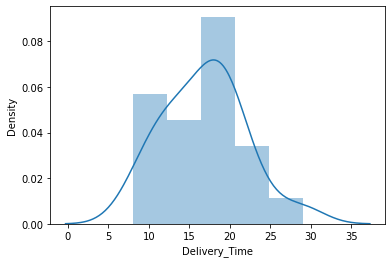

In [7]:
import seaborn as sns
sns.distplot(Delivery_data1.Delivery_Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


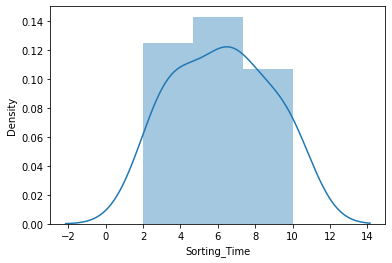

In [8]:
sns.distplot(Delivery_data1['Sorting_Time'])

Inference : From above histograms we can say data is normally distributed 

{'boxes': [<matplotlib.lines.Line2D at 0x7ff377b66b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff377af8510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff377aff550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff377af8fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff377af3a50>,
  <matplotlib.lines.Line2D at 0x7ff377af3f90>]}

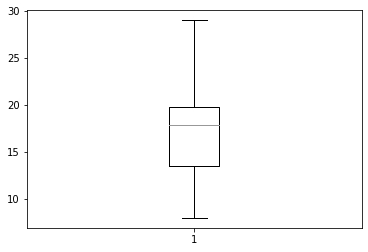

In [9]:
plt.boxplot(Delivery_data1['Delivery_Time'])

{'boxes': [<matplotlib.lines.Line2D at 0x7ff377ad2e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff377ae47d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff377aeb810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff377aeb2d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff377adfd10>,
  <matplotlib.lines.Line2D at 0x7ff377ae4290>]}

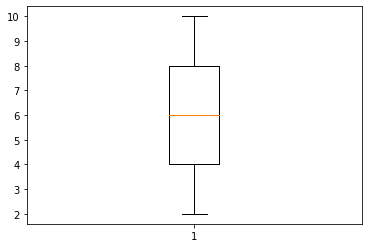

In [10]:
plt.boxplot(Delivery_data1['Sorting_Time'])

**Inference : From boxplots we can identify, there is no outlier in dataset**

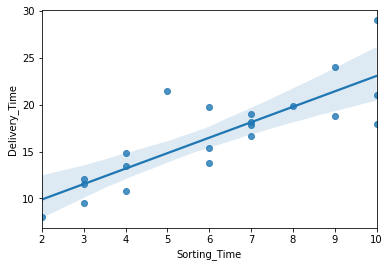

In [11]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=Delivery_data1);

# **Correlation Analysis**

In [13]:
Delivery_data1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# **Model Building**

In [6]:
import statsmodels.formula.api as smf
model1_data = Delivery_data1
model1 = smf.ols('Delivery_Time~Sorting_Time', data=model1_data).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Model Testing**

In [15]:
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [16]:
print(model1.tvalues, '\n' , model1.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [17]:
print(model1.rsquared, model1.rsquared_adj)

0.6822714748417231 0.6655489208860244


In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        15:01:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Model Prediction**

In [19]:
newdata = pd.Series([14,17])

In [20]:
data_pred = pd.DataFrame(newdata,columns=['Sorting_Time'] )

In [22]:
model1_pred = model1.predict(data_pred)
print(model1_pred)

0    29.669013
1    34.616072
dtype: float64


# **Log transformation**

# *Model2*
Applying log transformation on both dependent and independent variable

In [21]:
model2_data = Delivery_data1
# applying log transformation on both dependent and independent variable
model2 = smf.ols('np.log(Delivery_Time)~ np.log(Sorting_Time)', data=model2_data).fit()

In [24]:
model2.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 29 Aug 2021   Prob (F-statistic):           1.60e-07
Time:                           17:40:41   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# *Model3*
Applying log transformation on independent variable only

In [26]:
# applying log transformation on independent variable only
model3_data = Delivery_data1
model3 = smf.ols('Delivery_Time~ np.log(Sorting_Time)', data=model3_data).fit()

In [27]:
model3.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           2.64e-06
Time:                        15:05:27   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# *Model4*

In [31]:
# Applying log transformation on Dependent variable only
model4_data = Delivery_data1
model4 = smf.ols('np.log(Delivery_Time)~ (Sorting_Time)', data=model4_data).fit()

In [32]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 29 Aug 2021   Prob (F-statistic):           1.59e-06
Time:                           15:09:17   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Inference : After applying log transformation on both the variables, model is giving high R squared value. so we can say model2 is best***

# **Sqrt transformation**
# *Model5*

In [34]:
model5_data = Delivery_data1
# applying sqrt transformation on both dependent and independent variable
model5 = smf.ols('np.sqrt(Delivery_Time)~ np.sqrt(Sorting_Time)', data=model5_data).fit()


In [35]:
model5.params

Intercept                1.613479
np.sqrt(Sorting_Time)    1.002217
dtype: float64

In [36]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Sun, 29 Aug 2021   Prob (F-statistic):           8.48e-07
Time:                            15:18:27   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Cube root transformation**

In [16]:
model6_data = Delivery_data1
model6 = smf.ols('np.cbrt(Delivery_Time)~ np.cbrt(Sorting_Time)', data=model6_data).fit()

In [17]:
print(model6.tvalues, '\n' , model6.pvalues)

Intercept                4.900067
np.cbrt(Sorting_Time)    7.433210
dtype: float64 
 Intercept                9.941770e-05
np.cbrt(Sorting_Time)    4.904127e-07
dtype: float64


In [15]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Sun, 29 Aug 2021   Prob (F-statistic):           4.90e-07
Time:                            17:26:01   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference : After applying various transformations, log transformation is giving best model i.e. model2 is giving high R squared value, so we can say model2 is best**

# **Model prediction using model2**

In [18]:
newdata = pd.Series([14,17])

In [19]:
data_pred = pd.DataFrame(newdata,columns=['Sorting_Time'])

In [23]:
model2_pred = model2.predict(data_pred)
print(model2_pred)

0    3.318883
1    3.434895
dtype: float64
